#### 1. Import data

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### 2. Visualize data

<function matplotlib.pyplot.show(close=None, block=None)>

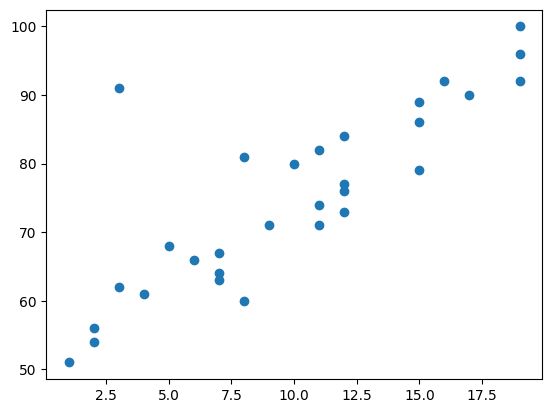

In [11]:
data = pd.read_csv("data.csv")
plt.scatter(data.studytime, data.score)
plt.show

### 3. Create the loss function

In [34]:
def mean_squared_error(m, b, points):
  total_error = 0
  n = len(points)
  for i in range(n):
      x = points.iloc[i].studytime
      y = points.iloc[i].score
      
      total_error += (y - (m * x + b)) ** 2 # (m * x + b) = predicted_y 
    
    # Prevent division by zero in case of n == 0
  if n == 0:
      return None
  return total_error / n
  

#### 4. Implement gradient decent

In [35]:
def gradient_decent(m_now, b_now, points, L):
  m_gradient = 0
  b_gradient = 0
  
  n = len(points)
  
  for i in range(n):
    x = points.iloc[i].studytime
    y = points.iloc[i].score
    
    m_gradient += -(2/n) * x * (y - (m_now * x + b_now))
    b_gradient += -(2/n) * (y - (m_now * x + b_now))
    
  m = m_now - m_gradient * L
  b = b_now - b_gradient * L
  
  return m, b

## Run model

Epoch 0, m: 0, b: 0, Loss: 5825.6
Epoch 50, m: 5.871788082587577, b: 6.163387186674226, Loss: 576.9907488283986
Epoch 100, m: 5.4732192331337375, b: 11.239653423861773, Loss: 473.2908275889507
Epoch 150, m: 5.116223970971355, b: 15.786428714088505, Loss: 390.0959426417576
Epoch 200, m: 4.796465873014056, b: 19.858942757652585, Loss: 323.3515440091403
Epoch 250, m: 4.510060836179809, b: 23.50666440131435, Loss: 269.80480550884255
Epoch 300, m: 4.25352989717297, b: 26.773902536604822, Loss: 226.84609642223324
Epoch 350, m: 4.023756973501184, b: 29.700344320134214, Loss: 192.38179965880576
Epoch 400, m: 3.8179510124070615, b: 32.32153725366531, Loss: 164.73227813796808
Epoch 450, m: 3.633612087937536, b: 34.66932097978034, Loss: 142.55001672178517
Epoch 500, m: 3.4685010343318496, b: 36.772214038165416, Loss: 124.75395029925929
Epoch 550, m: 3.3206122468647887, b: 38.65576028044291, Loss: 110.47677746403582
Epoch 600, m: 3.188149319756897, b: 40.342839151454136, Loss: 99.02269208768378
Ep

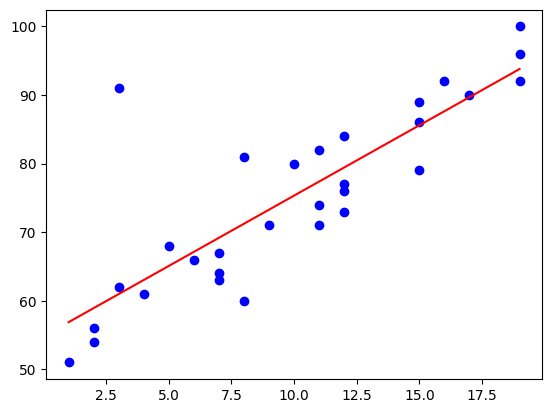

In [49]:
m = 0
b = 0
L = 0.005
epochs = 5000

for i in range(epochs):
  if i % 50 == 0:
    current_loss = mean_squared_error(m, b, data)
    print(f"Epoch {i}, m: {m}, b: {b}, Loss: {current_loss}")
  m, b = gradient_decent(m, b, data, L)
  
print(f"m: {m}, b: {b}")

# Scatter the data
plt.scatter(data.studytime, data.score, color="blue")
# Linear line
x_range = np.linspace(data.studytime.min(), data.studytime.max(), 100)
plt.plot(x_range, m * x_range + b, color="red")


plt.show()